<H1> <Center> Cab Project </Center> </H1>
<H4> Goal is to identify the below - </H4>
  <H5> 1. 24-hour curve of average demand and supply volume
  <H5> 2. Undersupplied hours during a weekly period (Monday to Sunday) 
    

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dd_df = pd.read_excel('C:\\Users\\kunal.singh\\Desktop\\CabProject\\Demand Side Data.xlsx')
ss_df = pd.read_excel('C:\\Users\\kunal.singh\\Desktop\\CabProject\\Supply Side Data.xlsx')

In [3]:
dd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Date                         839 non-null    object
 1   People saw 0 cars (unique)   839 non-null    int64 
 2   People saw +1 cars (unique)  839 non-null    int64 
 3   Coverage Ratio (%)           839 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 26.3+ KB


In [4]:
ss_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     840 non-null    object 
 1   Active drivers           840 non-null    int64  
 2   Online (h)               840 non-null    int64  
 3   Has booking (h)          840 non-null    int64  
 4   Waiting for booking (h)  840 non-null    int64  
 5   Hours per active driver  840 non-null    float64
 6   Rides per online hour    840 non-null    float64
 7   Finished Rides           795 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 52.6+ KB


In [5]:
dd_df.describe()

,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (%)
count,839.000000,839.000000,839.000000
mean,12.240763,36.041716,75.661502
std,16.602303,25.160951,18.342403
min,0.000000,0.000000,0.000000
25%,3.000000,19.000000,66.000000
50%,6.000000,32.000000,80.000000
75%,14.000000,49.000000,89.000000
max,129.000000,172.000000,100.000000


In [6]:
# Get the list of unnamed columns
unnamed_columns = dd_df.columns[dd_df.columns.str.contains('^Unnamed')]

# Drop the unnamed columns
dd_df = dd_df.drop(columns=unnamed_columns)

# Display the resulting DataFrame
dd_df.head()

# Repeat for dd_ss
unnamed_columns = ss_df.columns[ss_df.columns.str.contains('^Unnamed')]

# Drop the unnamed columns
ss_df = ss_df.drop(columns=unnamed_columns)

# Display the resulting DataFrame
ss_df.head()

# Checking if Data is unique on column Date
column_to_check = 'Date'

# Check if the table is unique on the specified column for dd_df
is_unique_dd = not dd_df.duplicated(subset=column_to_check).any()

# Display the result
if is_unique_dd:
    print("The table is unique on column", column_to_check)
else:
    print("The table is not unique on column", column_to_check)
    
# Check if the table is unique on the specified column for ss_df
is_unique_ss = not ss_df.duplicated(subset=column_to_check).any()

# Display the result
if is_unique_ss:
    print("# The table is unique on column", column_to_check)
else:
    print("# The table is not unique on column", column_to_check)


The table is unique on column Date
# The table is unique on column Date


In [7]:
df = dd_df.merge(ss_df, on='Date', how='left')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839 entries, 0 to 838
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         839 non-null    object 
 1   People saw 0 cars (unique)   839 non-null    int64  
 2   People saw +1 cars (unique)  839 non-null    int64  
 3   Coverage Ratio (%)           839 non-null    int64  
 4   Active drivers               839 non-null    int64  
 5   Online (h)                   839 non-null    int64  
 6   Has booking (h)              839 non-null    int64  
 7   Waiting for booking (h)      839 non-null    int64  
 8   Hours per active driver      839 non-null    float64
 9   Rides per online hour        839 non-null    float64
 10  Finished Rides               795 non-null    float64
dtypes: float64(3), int64(7), object(1)
memory usage: 78.7+ KB


,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (%),Active drivers,Online (h),Has booking (h),Waiting for booking (h),Hours per active driver,Rides per online hour,Finished Rides
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,795.000000
mean,12.240763,36.041716,75.661502,61.648391,23.215733,6.315852,16.914184,0.370083,0.569464,14.764780
std,16.602303,25.160951,18.342403,25.928193,11.095697,5.535662,9.068937,0.068212,0.385772,11.362529
min,0.000000,0.000000,0.000000,9.000000,2.000000,0.000000,2.000000,0.100000,0.000000,1.000000
25%,3.000000,19.000000,66.000000,41.000000,14.000000,2.000000,10.000000,0.300000,0.290000,6.000000
50%,6.000000,32.000000,80.000000,63.000000,23.000000,5.000000,16.000000,0.400000,0.500000,12.000000
75%,14.000000,49.000000,89.000000,80.500000,31.000000,9.000000,23.000000,0.400000,0.790000,20.000000
max,129.000000,172.000000,100.000000,129.000000,56.000000,29.000000,48.000000,0.600000,2.030000,62.000000


In [8]:
#seperate out Hours from Date Column

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H')

#keeping hour in new Hour column
df['Hour'] = df['Date'].dt.hour

#keeping date in Date column
df['Date'] = df['Date'].dt.date

df.head()

,Date,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (%),Active drivers,Online (h),Has booking (h),Waiting for booking (h),Hours per active driver,Rides per online hour,Finished Rides,Hour
0,2016-12-18,9,32,78,52,18,6,11,0.3,0.67,12.0,23
1,2016-12-18,29,64,69,59,20,11,9,0.3,1.40,28.0,22
2,2016-12-18,5,39,89,72,25,7,18,0.3,0.64,16.0,21
3,2016-12-18,13,48,79,86,29,7,23,0.3,0.52,15.0,20
4,2016-12-18,12,77,87,82,31,14,17,0.4,1.16,36.0,19


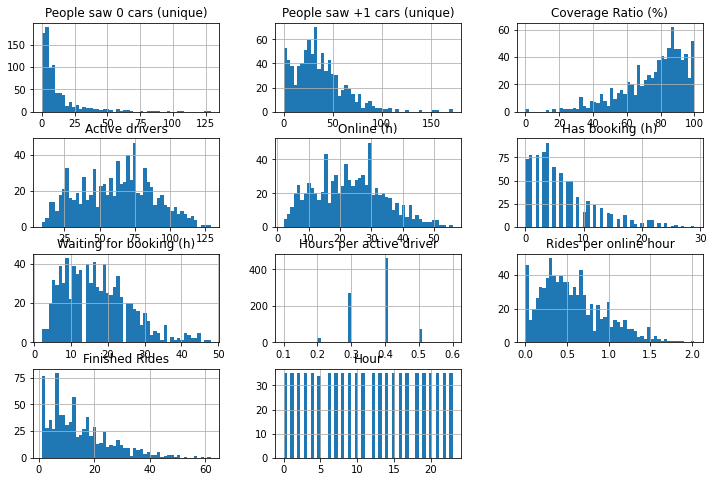

In [9]:
df.hist(bins=50, figsize=(12, 8))
plt.show()

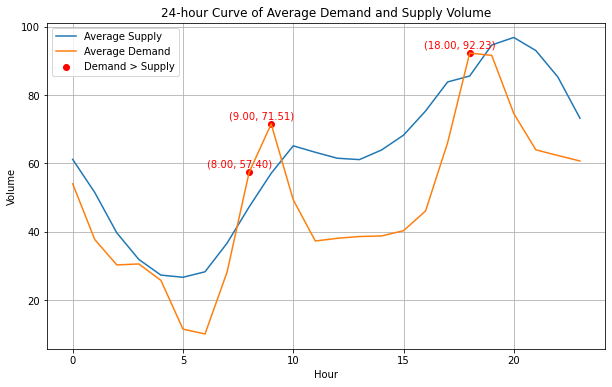

In [13]:
#1a

# Compute average demand and supply volume by hour
# Compute sum of demand by hour

df['Demand'] = df['People saw 0 cars (unique)'] + df['People saw +1 cars (unique)']
average_demand = df.groupby('Hour')['Demand'].mean()

# Compute average supply volume by hour
average_supply = df.groupby('Hour')['Active drivers'].mean()

plt.figure(figsize=(10, 6))

# Plot average supply
plt.plot(average_supply.index, average_supply.values, label='Average Supply')

# Plot average demand
plt.plot(average_demand.index, average_demand.values, label='Average Demand')

# Find where demand exceeds supply
demand_exceeds_supply = average_demand > average_supply

# Get the coordinates where demand exceeds supply
exceed_coordinates = [(x, y) for x, y, exceed in zip(average_demand.index, average_demand.values, demand_exceeds_supply) if exceed]

# Mark the points where demand exceeds supply
plt.scatter(*zip(*exceed_coordinates), color='red', label='Demand > Supply')

# Display the coordinates as text near the marked points
for coord in exceed_coordinates:
    plt.annotate(f'({coord[0]:.2f}, {coord[1]:.2f})', coord, textcoords="offset points", xytext=(-10,5), ha='center', color='red')

plt.xlabel('Hour')
plt.ylabel('Volume')
plt.title('24-hour Curve of Average Demand and Supply Volume')
plt.legend()
plt.grid(True)
plt.show()

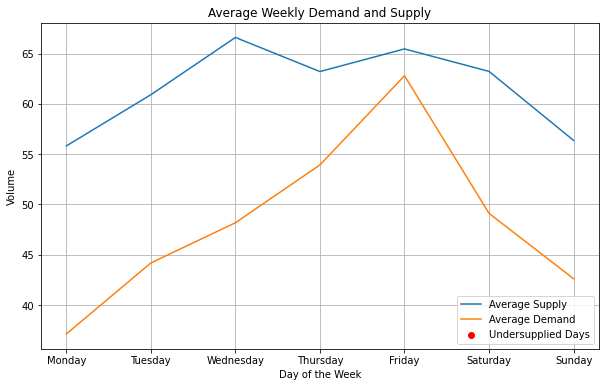

Undersupplied Days:


In [12]:
#1b
#plotting average

import calendar

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the day of the week (Monday=0, Sunday=6)
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Calculate the average supply for each day of the week
avg_supply = df.groupby('DayOfWeek')['Active drivers'].mean()

# Calculate the average demand for each day of the week
avg_demand = df.groupby('DayOfWeek')[['People saw 0 cars (unique)', 'People saw +1 cars (unique)']].mean()
avg_demand['Demand'] = avg_demand.sum(axis=1)

# Find the undersupplied days
undersupplied_days = avg_demand[avg_demand['Demand'] > avg_supply].index

# Create a visualization
plt.figure(figsize=(10, 6))
plt.plot(avg_supply.index, avg_supply.values, label='Average Supply')
plt.plot(avg_demand.index, avg_demand['Demand'].values, label='Average Demand')
plt.scatter(undersupplied_days, avg_demand.loc[undersupplied_days, 'Demand'], color='red', label='Undersupplied Days')
plt.xlabel('Day of the Week')
plt.ylabel('Volume')
plt.title('Average Weekly Demand and Supply')
plt.legend()
plt.grid(True)

# Format x-axis labels with day names
day_labels = [calendar.day_name[i] for i in avg_supply.index]
plt.xticks(avg_supply.index, day_labels)

plt.show()

# Print the undersupplied days
print("Undersupplied Days:")
for day in undersupplied_days:
    print(calendar.day_name[day])

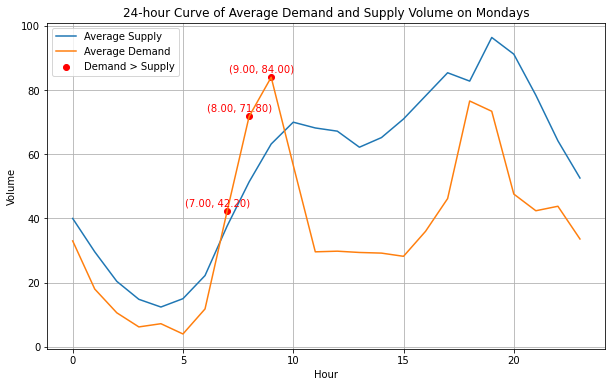

In [14]:

# Filter the dataframe for Mondays
monday_df = df[df['DayOfWeek'] == 0]

# Compute average demand and supply volume by hour for Mondays
monday_demand = monday_df.groupby('Hour')['Demand'].mean()
monday_supply = monday_df.groupby('Hour')['Active drivers'].mean()

plt.figure(figsize=(10, 6))

# Plot average supply for Mondays
plt.plot(monday_supply.index, monday_supply.values, label='Average Supply')

# Plot average demand for Mondays
plt.plot(monday_demand.index, monday_demand.values, label='Average Demand')

# Find where demand exceeds supply on Mondays
demand_exceeds_supply_monday = monday_demand > monday_supply

# Get the coordinates where demand exceeds supply on Mondays
exceed_coordinates_monday = [(x, y) for x, y, exceed in zip(monday_demand.index, monday_demand.values, demand_exceeds_supply_monday) if exceed]

# Mark the points where demand exceeds supply on Mondays
plt.scatter(*zip(*exceed_coordinates_monday), color='red', label='Demand > Supply')

# Display the coordinates as text near the marked points on Mondays
for coord in exceed_coordinates_monday:
    plt.annotate(f'({coord[0]:.2f}, {coord[1]:.2f})', coord, textcoords="offset points", xytext=(-10, 5), ha='center', color='red')

plt.xlabel('Hour')
plt.ylabel('Volume')
plt.title('24-hour Curve of Average Demand and Supply Volume on Mondays')
plt.legend()
plt.grid(True)
plt.show()


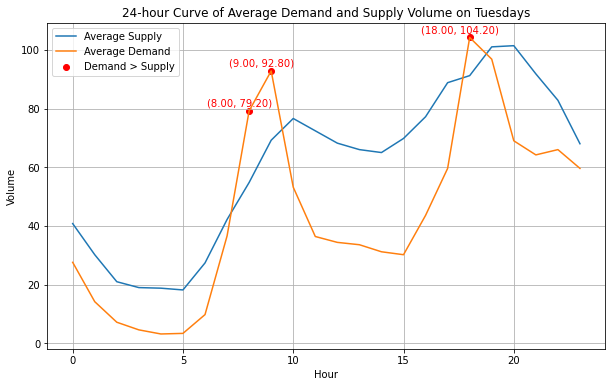

In [15]:
# Filter the dataframe for Tuesdays
tuesday_df = df[df['DayOfWeek'] == 1]

# Compute average demand and supply volume by hour for Tuesdays
tuesday_demand = tuesday_df.groupby('Hour')['Demand'].mean()
tuesday_supply = tuesday_df.groupby('Hour')['Active drivers'].mean()

plt.figure(figsize=(10, 6))

# Plot average supply for Tuesdays
plt.plot(tuesday_supply.index, tuesday_supply.values, label='Average Supply')

# Plot average demand for Tuesdays
plt.plot(tuesday_demand.index, tuesday_demand.values, label='Average Demand')

# Find where demand exceeds supply on Tuesdays
demand_exceeds_supply_tuesday = tuesday_demand > tuesday_supply

# Get the coordinates where demand exceeds supply on Tuesdays
exceed_coordinates_tuesday = [(x, y) for x, y, exceed in zip(tuesday_demand.index, tuesday_demand.values, demand_exceeds_supply_tuesday) if exceed]

# Mark the points where demand exceeds supply on Tuesdays
plt.scatter(*zip(*exceed_coordinates_tuesday), color='red', label='Demand > Supply')

# Display the coordinates as text near the marked points on Tuesdays
for coord in exceed_coordinates_tuesday:
    plt.annotate(f'({coord[0]:.2f}, {coord[1]:.2f})', coord, textcoords="offset points", xytext=(-10, 5), ha='center', color='red')

plt.xlabel('Hour')
plt.ylabel('Volume')
plt.title('24-hour Curve of Average Demand and Supply Volume on Tuesdays')
plt.legend()
plt.grid(True)
plt.show()


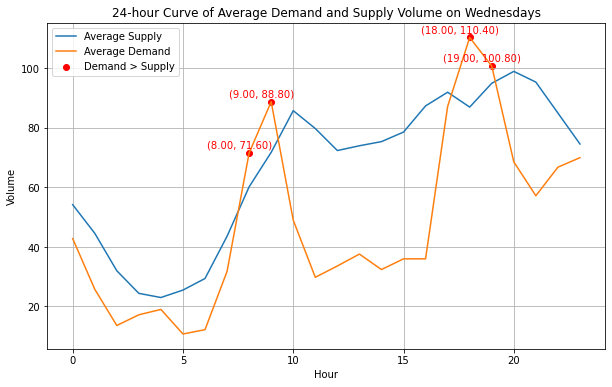

In [16]:
# Filter the dataframe for Wednesdays
wednesday_df = df[df['DayOfWeek'] == 2]

# Compute average demand and supply volume by hour for Wednesdays
wednesday_demand = wednesday_df.groupby('Hour')['Demand'].mean()
wednesday_supply = wednesday_df.groupby('Hour')['Active drivers'].mean()

plt.figure(figsize=(10, 6))

# Plot average supply for Wednesdays
plt.plot(wednesday_supply.index, wednesday_supply.values, label='Average Supply')

# Plot average demand for Wednesdays
plt.plot(wednesday_demand.index, wednesday_demand.values, label='Average Demand')

# Find where demand exceeds supply on Wednesdays
demand_exceeds_supply_wednesday = wednesday_demand > wednesday_supply

# Get the coordinates where demand exceeds supply on Wednesdays
exceed_coordinates_wednesday = [(x, y) for x, y, exceed in zip(wednesday_demand.index, wednesday_demand.values, demand_exceeds_supply_wednesday) if exceed]

# Mark the points where demand exceeds supply on Wednesdays
plt.scatter(*zip(*exceed_coordinates_wednesday), color='red', label='Demand > Supply')

# Display the coordinates as text near the marked points on Wednesdays
for coord in exceed_coordinates_wednesday:
    plt.annotate(f'({coord[0]:.2f}, {coord[1]:.2f})', coord, textcoords="offset points", xytext=(-10, 5), ha='center', color='red')

plt.xlabel('Hour')
plt.ylabel('Volume')
plt.title('24-hour Curve of Average Demand and Supply Volume on Wednesdays')
plt.legend()
plt.grid(True)
plt.show()


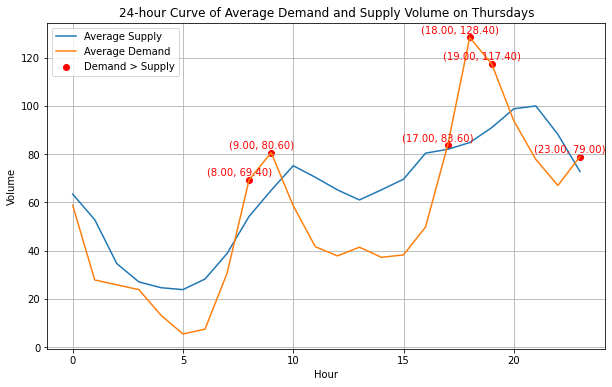

In [17]:
# Filter the dataframe for Thursdays
thursday_df = df[df['DayOfWeek'] == 3]

# Compute average demand and supply volume by hour for Thursdays
thursday_demand = thursday_df.groupby('Hour')['Demand'].mean()
thursday_supply = thursday_df.groupby('Hour')['Active drivers'].mean()

plt.figure(figsize=(10, 6))

# Plot average supply for Thursdays
plt.plot(thursday_supply.index, thursday_supply.values, label='Average Supply')

# Plot average demand for Thursdays
plt.plot(thursday_demand.index, thursday_demand.values, label='Average Demand')

# Find where demand exceeds supply on Thursdays
demand_exceeds_supply_thursday = thursday_demand > thursday_supply

# Get the coordinates where demand exceeds supply on Thursdays
exceed_coordinates_thursday = [(x, y) for x, y, exceed in zip(thursday_demand.index, thursday_demand.values, demand_exceeds_supply_thursday) if exceed]

# Mark the points where demand exceeds supply on Thursdays
plt.scatter(*zip(*exceed_coordinates_thursday), color='red', label='Demand > Supply')

# Display the coordinates as text near the marked points on Thursdays
for coord in exceed_coordinates_thursday:
    plt.annotate(f'({coord[0]:.2f}, {coord[1]:.2f})', coord, textcoords="offset points", xytext=(-10, 5), ha='center', color='red')

plt.xlabel('Hour')
plt.ylabel('Volume')
plt.title('24-hour Curve of Average Demand and Supply Volume on Thursdays')
plt.legend()
plt.grid(True)
plt.show()


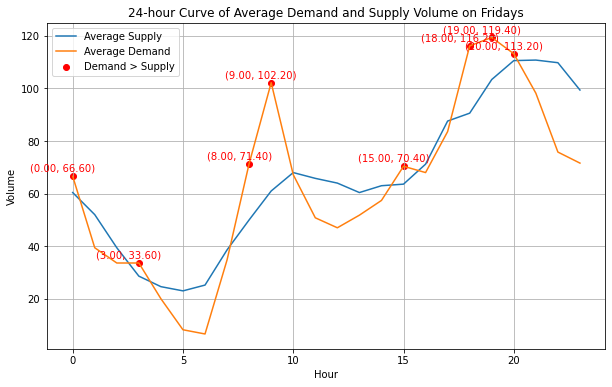

In [18]:
# Filter the dataframe for Fridays
friday_df = df[df['DayOfWeek'] == 4]

# Compute average demand and supply volume by hour for Fridays
friday_demand = friday_df.groupby('Hour')['Demand'].mean()
friday_supply = friday_df.groupby('Hour')['Active drivers'].mean()

plt.figure(figsize=(10, 6))

# Plot average supply for Fridays
plt.plot(friday_supply.index, friday_supply.values, label='Average Supply')

# Plot average demand for Fridays
plt.plot(friday_demand.index, friday_demand.values, label='Average Demand')

# Find where demand exceeds supply on Fridays
demand_exceeds_supply_friday = friday_demand > friday_supply

# Get the coordinates where demand exceeds supply on Fridays
exceed_coordinates_friday = [(x, y) for x, y, exceed in zip(friday_demand.index, friday_demand.values, demand_exceeds_supply_friday) if exceed]

# Mark the points where demand exceeds supply on Fridays
plt.scatter(*zip(*exceed_coordinates_friday), color='red', label='Demand > Supply')

# Display the coordinates as text near the marked points on Fridays
for coord in exceed_coordinates_friday:
    plt.annotate(f'({coord[0]:.2f}, {coord[1]:.2f})', coord, textcoords="offset points", xytext=(-10, 5), ha='center', color='red')

plt.xlabel('Hour')
plt.ylabel('Volume')
plt.title('24-hour Curve of Average Demand and Supply Volume on Fridays')
plt.legend()
plt.grid(True)
plt.show()


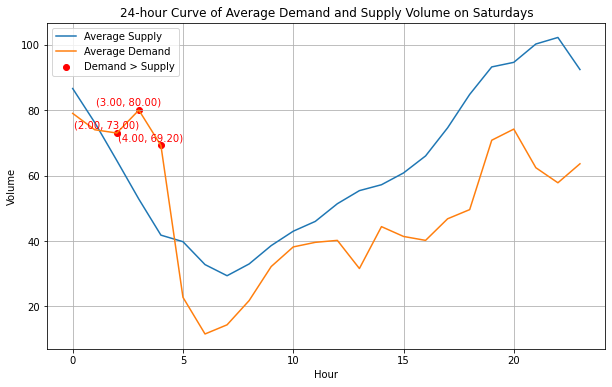

In [19]:
# Filter the dataframe for Saturdays
saturday_df = df[df['DayOfWeek'] == 5]

# Compute average demand and supply volume by hour for Saturdays
saturday_demand = saturday_df.groupby('Hour')['Demand'].mean()
saturday_supply = saturday_df.groupby('Hour')['Active drivers'].mean()

plt.figure(figsize=(10, 6))

# Plot average supply for Saturdays
plt.plot(saturday_supply.index, saturday_supply.values, label='Average Supply')

# Plot average demand for Saturdays
plt.plot(saturday_demand.index, saturday_demand.values, label='Average Demand')

# Find where demand exceeds supply on Saturdays
demand_exceeds_supply_saturday = saturday_demand > saturday_supply

# Get the coordinates where demand exceeds supply on Saturdays
exceed_coordinates_saturday = [(x, y) for x, y, exceed in zip(saturday_demand.index, saturday_demand.values, demand_exceeds_supply_saturday) if exceed]

# Mark the points where demand exceeds supply on Saturdays
plt.scatter(*zip(*exceed_coordinates_saturday), color='red', label='Demand > Supply')

# Display the coordinates as text near the marked points on Saturdays
for coord in exceed_coordinates_saturday:
    plt.annotate(f'({coord[0]:.2f}, {coord[1]:.2f})', coord, textcoords="offset points", xytext=(-10, 5), ha='center', color='red')

plt.xlabel('Hour')
plt.ylabel('Volume')
plt.title('24-hour Curve of Average Demand and Supply Volume on Saturdays')
plt.legend()
plt.grid(True)
plt.show()


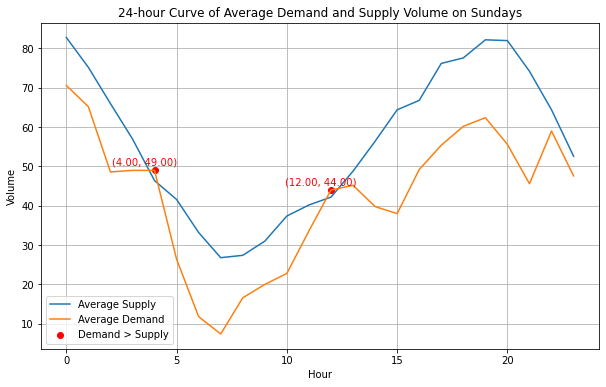

In [20]:
# Filter the dataframe for Sundays
sunday_df = df[df['DayOfWeek'] == 6]

# Compute average demand and supply volume by hour for Sundays
sunday_demand = sunday_df.groupby('Hour')['Demand'].mean()
sunday_supply = sunday_df.groupby('Hour')['Active drivers'].mean()

plt.figure(figsize=(10, 6))

# Plot average supply for Sundays
plt.plot(sunday_supply.index, sunday_supply.values, label='Average Supply')

# Plot average demand for Sundays
plt.plot(sunday_demand.index, sunday_demand.values, label='Average Demand')

# Find where demand exceeds supply on Sundays
demand_exceeds_supply_sunday = sunday_demand > sunday_supply

# Get the coordinates where demand exceeds supply on Sundays
exceed_coordinates_sunday = [(x, y) for x, y, exceed in zip(sunday_demand.index, sunday_demand.values, demand_exceeds_supply_sunday) if exceed]

# Mark the points where demand exceeds supply on Sundays
plt.scatter(*zip(*exceed_coordinates_sunday), color='red', label='Demand > Supply')

# Display the coordinates as text near the marked points on Sundays
for coord in exceed_coordinates_sunday:
    plt.annotate(f'({coord[0]:.2f}, {coord[1]:.2f})', coord, textcoords="offset points", xytext=(-10, 5), ha='center', color='red')

plt.xlabel('Hour')
plt.ylabel('Volume')
plt.title('24-hour Curve of Average Demand and Supply Volume on Sundays')
plt.legend()
plt.grid(True)
plt.show()


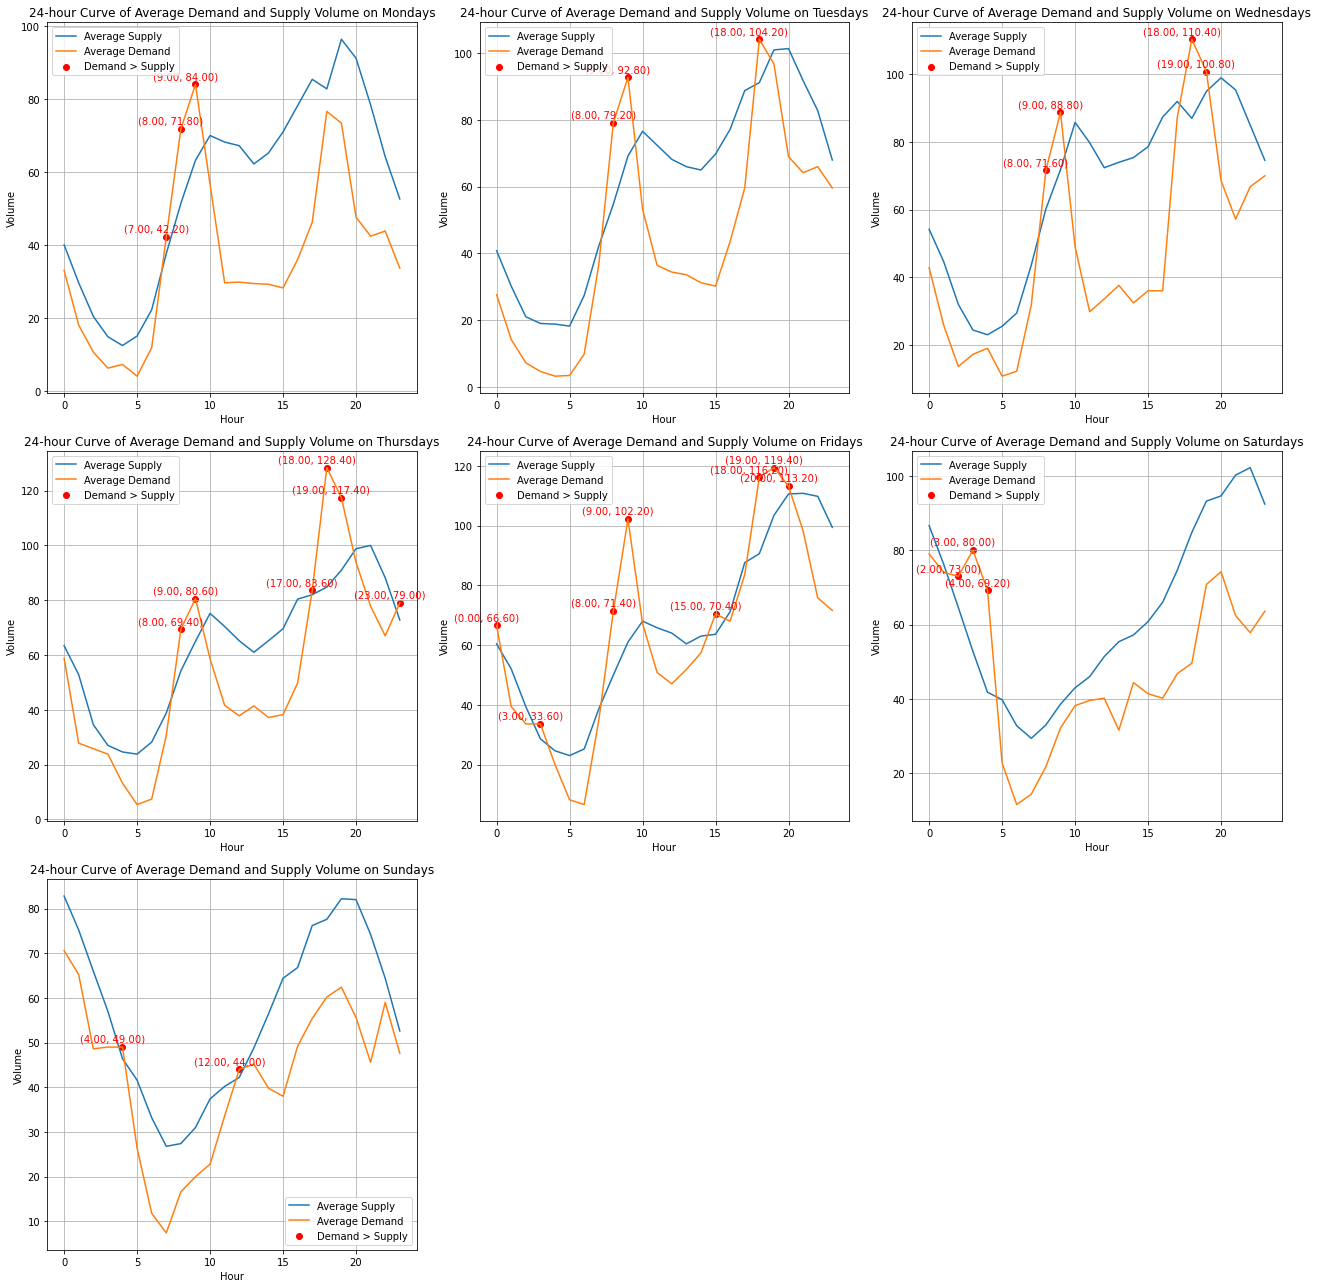

In [24]:
import matplotlib.pyplot as plt

# Create a function to plot the demand, supply, and exceed points
def plot_demand_and_supply(demand, supply, exceed_coordinates, title):
    plt.plot(supply.index, supply.values, label='Average Supply')
    plt.plot(demand.index, demand.values, label='Average Demand')

    # Mark the points where demand exceeds supply
    plt.scatter(*zip(*exceed_coordinates), color='red', label='Demand > Supply')

    # Display the coordinates as text near the marked points
    for coord in exceed_coordinates:
        plt.annotate(f'({coord[0]:.2f}, {coord[1]:.2f})', coord, textcoords="offset points", xytext=(-10, 5), ha='center', color='red')

    plt.xlabel('Hour')
    plt.ylabel('Volume')
    plt.title(title)
    plt.legend()
    plt.grid(True)

# Create a 3x3 subplot grid
plt.figure(figsize=(18, 18))

# Loop through each day of the week and plot the data
for day, title in enumerate(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], start=1):
    plt.subplot(3, 3, day)
    
    # Filter the dataframe for the current day
    day_df = df[df['DayOfWeek'] == day - 1]

    # Compute average demand and supply volume by hour for the current day
    demand = day_df.groupby('Hour')['Demand'].mean()
    supply = day_df.groupby('Hour')['Active drivers'].mean()

    # Find where demand exceeds supply for the current day
    demand_exceeds_supply = demand > supply

    # Get the coordinates where demand exceeds supply for the current day
    exceed_coordinates = [(x, y) for x, y, exceed in zip(demand.index, demand.values, demand_exceeds_supply) if exceed]

    # Plot the demand and supply for the current day
    plot_demand_and_supply(demand, supply, exceed_coordinates, f'24-hour Curve of Average Demand and Supply Volume on {title}s')

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()
